In [2]:
#import the necessary libraries for EDA and Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
yb_df=pd.read_csv('data_YesBank_StockPrices.csv', index_col='Date',parse_dates=True)
yb_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [4]:
#Check for missing values
yb_df.isna().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

As we can see the above dataset does not contain any missing values. This certifies that the given dataset is consistent and is ready for an for it's first set of EDA to be performed on it.

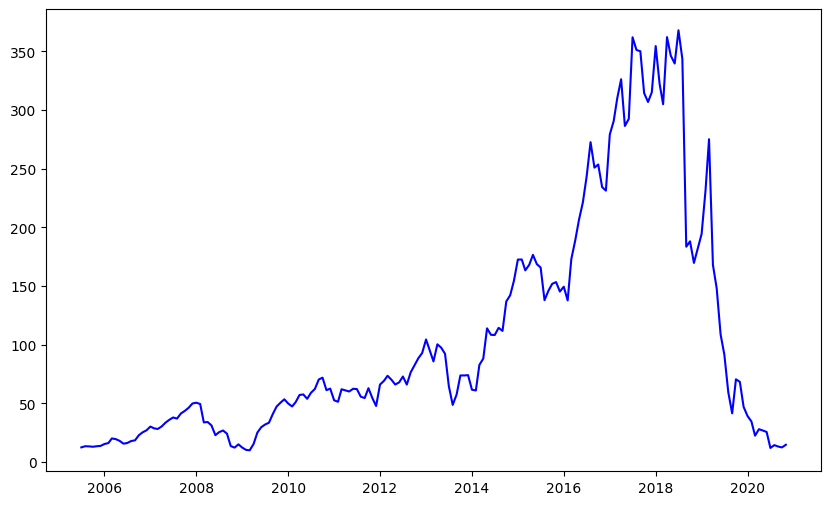

In [5]:
# Plotting the line chart
plt.figure(figsize=(10, 6))  # Set the figure size if needed
plt.plot(yb_df.index, yb_df['Close'], label='Yes Bank Stock Price', color='blue')


The line plot for the given monthly time series data for Yes Bank stock prices can help us make inferences on the trends that the stock was perusing in the period. From the end of 2005 to early 2008 the stock registered a positive outlook and an uptrend. There was a brief downtrend from early 2008 to early 2009 which can be attributed to the 2008 Sub-Prime Crisis- which wreaked havoc in the world stock market. As Yes Bank was in the banking sector it was clearly affected due to this predicament. 

After 2009 there was a persistent uptrend and the margin for short-term speculation increased for Yes Bank ever since the Reserve Bank of India(RBI) addressed its concern about the asset quality and lending practices of the bank. The period shows great volatility for Yes Bank. 

Post-2018 Yes Bank has gone through corporate restructuring and the investor sentiments regarding the fundamentals of the stocks have hit an all-time low. Hence, we saw Yes Bank lose its stock value and market share in this period. And since its loss in market share due to the negative perception built around the companies' fundamentals, it hasn't been able to recover back to its previous high levels.

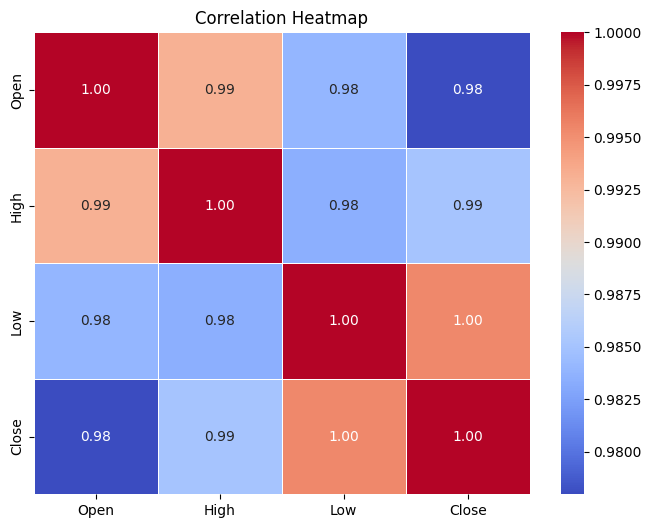

In [6]:
#Plotting the Heatmap to validate trading theories on price action.
correlation_matrix = yb_df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

The above chart is a correlation heatmap of the <b>Monthly Open, Monthly High, Monthly Low and Monthly Close</b> of the Yes Bank Stock. The positive values and high magnitude of the correlation coefficients describe a positive and high degree of correlation of the given attributes among each other.
The above heatmap falls in line with general financial literature and can be used to validate the nature and the credibility of the financial data.


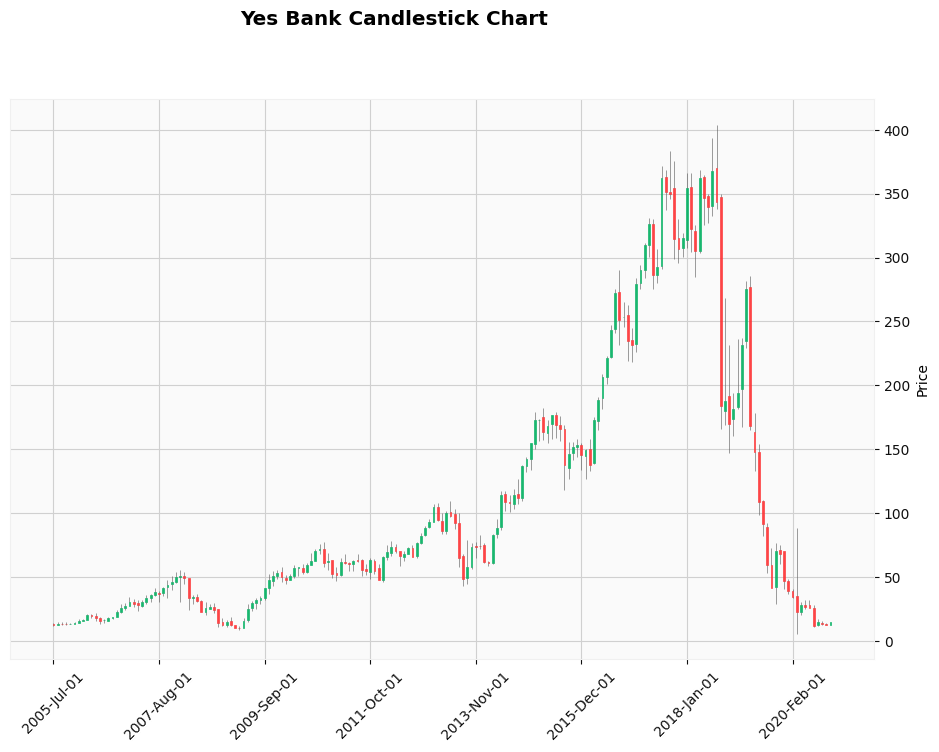

In [32]:
#Plot Candlestick Chart for Yes Bank Stock
import mplfinance as mpf
mpf.plot(yb_df, type='candle', style='yahoo', ylabel='Price', ylabel_lower='Volume', figsize=(12,8), title= 'Yes Bank Candlestick Chart')


A candlestick chart is a financial chart used to represent the price movement of an asset, such as a stock, over a certain period of time. It provides a visual representation of four key price points during that time frame: the opening price, closing price, highest price (high), and lowest price (low). Each time period is typically represented by a single "candlestick," and the chart is composed of a series of these candlesticks.

The representation of the Yes Bank stock price data in the form of candlesticks help us better present the price movements in the stock in terms of the trading and investment domain elucidating the open interest and the price-action on the stock over the period of time. It can help us to eruditely show the general trend of the stock at a given period of time,as well as give us a brief idea of the stocks price position in light of the buying or selling pressure that the stock was experiencing.

# Feature Engineering

In [ ]:
#Explain Feature Engineering Markdown
#Add Two Features Intraday Movement and Normalised Price Position

In [42]:
yb_df['Intraday Movement']=yb_df['Close']-yb_df['Open']
yb_df['Normalised Price Position']=yb_df['Intraday Movement']/(yb_df['High']-yb_df['Low'])
yb_df['Normalised Price Position']=yb_df['Normalised Price Position'].round(2)

In [43]:
yb_df.head()

,Open,High,Low,Close,Intraday Movement,Normalised Price Position
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,-0.54,-0.20
2005-08-01,12.58,14.88,12.55,13.42,0.84,0.36
2005-09-01,13.48,14.87,12.27,13.30,-0.18,-0.07
2005-10-01,13.20,14.47,12.40,12.99,-0.21,-0.10
2005-11-01,13.35,13.88,12.88,13.41,0.06,0.06


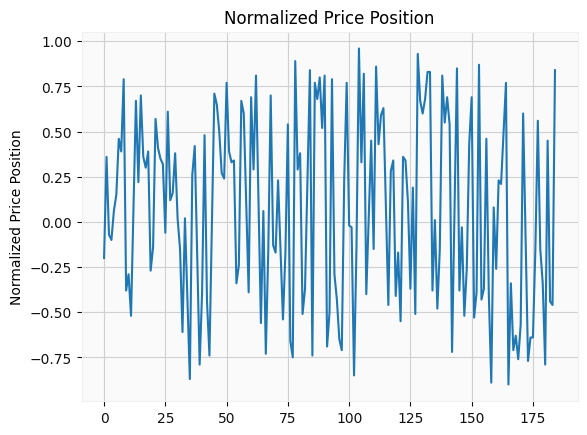

In [49]:
#Chart New Features
# Plot the 'Normalised Price Position'
yb_df['Normalised Price Position'].plot(kind='line', title='Normalized Price Position')
plt.ylabel('Normalized Price Position')
plt.show()

In [ ]:
#Explain Normalised Price Position Markdown

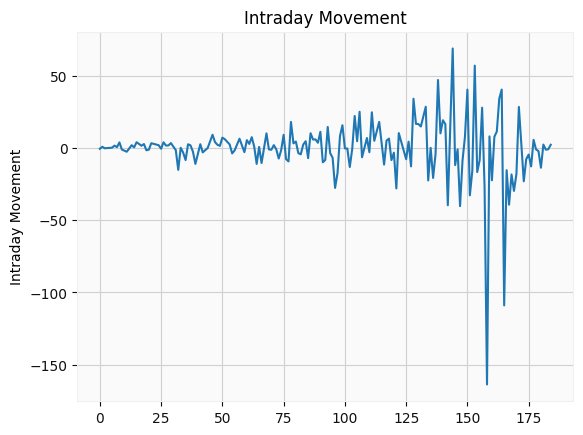

In [50]:
# Plot the 'Intraday Movement'
yb_df['Intraday Movement'].plot(kind='line', title='Intraday Movement')
plt.ylabel('Intraday Movement')
plt.show()

In [ ]:
#Explain Intraday Movement Markdown

# Model Selection

<b>Model 1: Linear Regression Model

In [59]:
#Import Sci-kit Learn and it's necessary Modules for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Perform Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split
X = yb_df.drop('Close', axis=1)
y = yb_df['Close']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

In [93]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.00
R-squared Score: 1.00


<b>Model 2: Random Forest Regressor

In [57]:
#Import Sci-kit Learn and it's necessary Modules for Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

In [96]:
# Create a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_reg.predict(X_test)

In [97]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [98]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 276.32
R-squared Score: 0.97


<b> Model 3: Support Vector Regressor

In [99]:
#Import Sci-kit Learn and it's necessary Modules for Support Vector Regressor Model
from sklearn.svm import SVR

In [100]:
# Create a Support Vector Regressor
svm_reg = SVR(kernel='linear')  # You can choose different kernels, e.g., 'linear', 'rbf', 'poly', etc.

# Train the model
svm_reg.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = svm_reg.predict(X_test)

In [101]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.00
R-squared Score: 1.00


# Ensemble Learning

In [91]:
#Explain Ensemble Learning Markdown

<b> Voting Regressor

In [102]:
from sklearn.ensemble import VotingRegressor

In [103]:
# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('linear', linear_reg), ('rf', rf_reg), ('svm', svm_reg)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test)


In [104]:
# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f'Ensemble Model Mean Squared Error: {mse_ensemble:.2f}')
print(f'Ensemble Model R-squared Score: {r2_ensemble:.2f}')

Ensemble Model Mean Squared Error: 30.74
Ensemble Model R-squared Score: 1.00


<b> Gradient Boosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor


In [107]:
# Create the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred_gb = gb_regressor.predict(X_test)

In [109]:
# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Mean Squared Error: {mse_gb:.2f}')
print(f'Gradient Boosting R-squared Score: {r2_gb:.2f}')

Gradient Boosting Mean Squared Error: 323.30
Gradient Boosting R-squared Score: 0.97
